- Muhammad Hamza
- 2330-0068
- BS-AI

# **TASK # 1**

In [1]:
import math
from collections import Counter

In [2]:
dataset = [
    [2.7810836, 2.550537003, 0],
    [1.465489372, 2.362125076, 0],
    [3.396561688, 4.400293529, 0],
    [1.38807019, 1.850220317, 0],
    [3.06407232, 3.005305973, 0],
    [7.627531214, 2.759262235, 1],
    [5.332441248, 2.088626775, 1],
    [6.922596716, 1.77106367, 1],
    [8.675418651, -0.242068655, 1],
    [7.673756466, 3.508563011, 1]
]

test_example = [5.675418651, -0.543068655, None]

# Calculate Distance  :

In [3]:
def calculate_distance(point1, point2):

    dis= math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

    return dis

# KNN Classification

In [4]:
def knn_classify(dataset, test_example, k):
    distances = []

    for index, example in enumerate(dataset):
        distance = calculate_distance(test_example[:-1], example[:-1])
        distances.append((distance, index)) 

    distances.sort(key=lambda x: x[0])

    k_nearest_neighbors = distances[:k]

    k_labels = [dataset[i][2] for _, i in k_nearest_neighbors]

    most_common_label = Counter(k_labels).most_common(1)[0][0]
    return most_common_label

k_3_result = knn_classify(dataset, test_example, k=3)
k_7_result = knn_classify(dataset, test_example, k=7)

print("After Calculating Euclidian distance and KNN Classification Algorithm ")
print(f"\n\t\t Predicted label for k=3 : {k_3_result}")
print(f"\n\t\t Predicted label for k=7 : {k_7_result}")


After Calculating Euclidian distance and KNN Classification Algorithm 

		 Predicted label for k=3 : 1

		 Predicted label for k=7 : 1


# **TASK # 2**

In [2]:
import math
import pandas as pd
from collections import Counter

df = pd.read_csv("IRIS.csv")



In [3]:
data = df.values.tolist()

test_examples = [
    [3.7, 0.5, 2.5, 0.3],
    [3.5, 5.3, 3.5, 1.3],
    [5.7, 2.3, 4.5, 4.2],
    [4.5, 2.3, 3.1, 1.2]
]

# Calculate Distance

In [4]:
def calculate_distance(point1, point2):
    dis= math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

    return dis

# Classification Algorithm

In [5]:
def knn_classify(dataset, test_example, k):

    distances = []

    for index, example in enumerate(dataset):
        distance = calculate_distance(test_example, example[:-1])
        distances.append((distance, example[-1]))

    distances.sort(key=lambda x: x[0])

    k_nearest_neighbors = distances[:k]

    k_labels = [label for _, label in k_nearest_neighbors]

    most_common_label = Counter(k_labels).most_common(1)[0][0]
    return most_common_label

# Prediction of Class

In [6]:
print("Predictions for K=3 and K=7:")

for i, test in enumerate(test_examples):

    k3_result = knn_classify(data, test, k=3)
    k7_result = knn_classify(data, test, k=7)
    print(f"\n\t\t Test Example {i+1} : K=3 -> {k3_result}, K=7 -> {k7_result}")

Predictions for K=3 and K=7:

		 Test Example 1 : K=3 -> Iris-versicolor, K=7 -> Iris-versicolor

		 Test Example 2 : K=3 -> Iris-setosa, K=7 -> Iris-setosa

		 Test Example 3 : K=3 -> Iris-virginica, K=7 -> Iris-virginica

		 Test Example 4 : K=3 -> Iris-versicolor, K=7 -> Iris-versicolor


# **TASK # 3**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [7]:
maxdepths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X = np.array(maxdepths).reshape(-1, 1)
y = np.array(labels)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numNeighbors = [1, 3, 5, 7, 9, 11]

train_accuracies = []
test_accuracies = []

for n in numNeighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"\t\t Train Accuracy for {n} neighbors: {train_accuracy:.4f}")
    train_accuracies.append(train_accuracy)

    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\t\t Test Accuracy for {n} neighbors: {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)



		 Train Accuracy for 1 neighbors: 1.0000
		 Test Accuracy for 1 neighbors: 0.8333
		 Train Accuracy for 3 neighbors: 1.0000
		 Test Accuracy for 3 neighbors: 1.0000
		 Train Accuracy for 5 neighbors: 1.0000
		 Test Accuracy for 5 neighbors: 1.0000
		 Train Accuracy for 7 neighbors: 0.7273
		 Test Accuracy for 7 neighbors: 0.6667
		 Train Accuracy for 9 neighbors: 0.7273
		 Test Accuracy for 9 neighbors: 0.6667
		 Train Accuracy for 11 neighbors: 0.7273
		 Test Accuracy for 11 neighbors: 0.6667


# Plot Accuracies

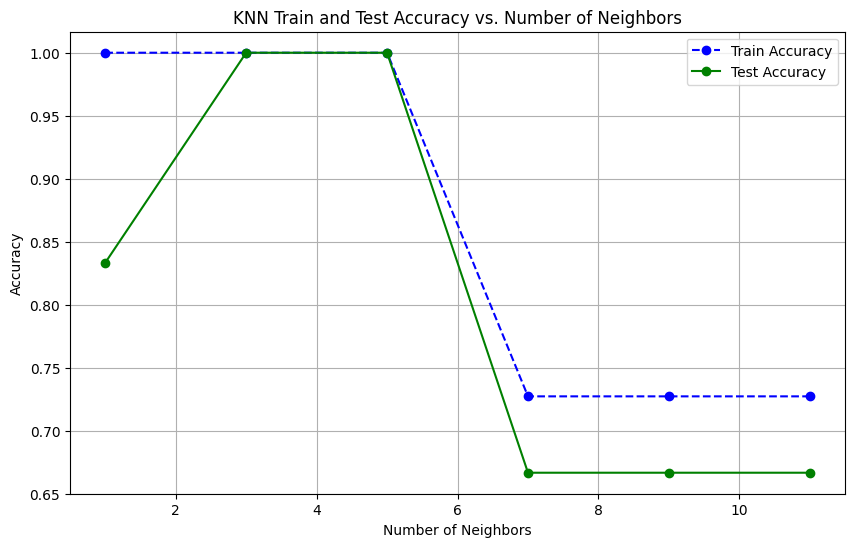

In [19]:

plt.figure(figsize=(10, 6))
plt.plot(numNeighbors, train_accuracies, label='Train Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(numNeighbors, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='green')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Train and Test Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

### For K=1

For small K (K = 1) → Overfitting

Train accuracy ≈ 100%

Test accuracy ≈ 83%

Big gap between train and test performance

Interpretation:
The model is memorizing training data and not generalizing well.

This is Underfitting

### For K=3-5

For moderate K (K = 3 or 5) → Best fit

Train accuracy ≈ 100%

Test accuracy ≈ 100%

Train and test accuracies are both high and close

Interpretation:
The model captures the true pattern without memorizing noise.

This is the OPTIMAL / WELL-FITTED region

### For K=7(Large)

For large K (K ≥ 7) → Underfitting

Train accuracy ≈ 73%

Test accuracy ≈ 67%

Both accuracies are low and close

Interpretation:
The model is too simple and cannot capture data patterns.

This is UNDERFITTING

# **TASK # 4**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [17]:
csv_file_path = "IRIS.csv"
iris = pd.read_csv(csv_file_path)


In [ ]:

X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=200)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)




# Calculate Evaluation Metrics

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Display Metrics

In [20]:

print("\n\t\t\t **** Evaluation Metrics ***** ")

print(f"\n\t\t Accuracy = {accuracy:.4f}")
print(f"\n\t\t Precision =  {precision:.4f}")
print(f"\n\t\t Recall = {recall:.4f}")
print(f"\n\t\t F1-Score = {f1:.4f}")


			 **** Evaluation Metrics ***** 

		 Accuracy = 1.0000

		 Precision =  1.0000

		 Recall = 1.0000

		 F1-Score = 1.0000


# Classification Report

In [21]:

print("\n\t\t\t ***  Classification Report **** \n ")
print(classification_report(y_test, y_pred))


			 ***  Classification Report **** 
 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

